# Application of Bootstrap samples in Random Forest

In [0]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

 <li> Load the boston house dataset </li>

In [0]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [3]:
x.shape

(506, 13)

### Task: 1
<font color='red'><b>Step 1 Creating samples: </b></font> Randomly create 30 samples from the whole boston data points.
<ol>
<li>Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points</li>
<li>Ex: For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly consider we have selected [4, 5, 7, 8, 9, 3] now we will replciate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]</li>
<li> we create 30 samples like this </li>
<li> Note that as a part of the Bagging when you are taking the random samples make sure each of the sample will have                different set of columns</li>
<li> Ex: assume we have 10 columns for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample [7, 9, 1, 4, 5, 6, 2] and so on...</li>
<li> Make sure each sample will have atleast 3 feautres/columns/attributes</li>
</ol>

<font color='red'><b>Step 2 Building High Variance Models on each of the sample and finding train MSE value:</b></font> Build a DecisionTreeRegressor on each of the sample.
<ol><li>Build a regression trees on each of 30 samples.</li>
<li>computed the predicted values of each data point(506 data points) in your corpus.</li>
<li> predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.</li>
<li>Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.</li>
</ol>

<font color='red'><b>Step 3 Calculating the OOB score :</b></font>
<ol>
<li>Computed the predicted values of each data point(506 data points) in your corpus.</li>
<li>Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.</li>
<li>Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.</li>
</ol>

### Task: 2
<pre>
<font color='red'><b>Computing CI of OOB Score and Train MSE</b></font>
<ol>
<li> Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>
</pre>
### Task: 3
<pre>
<font color='red'><b>Given a single query point predict the price of house.</b></font>

<li>Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] Predict the house price for this point as mentioned in the step 2 of Task 1. </li>
</pre>

***Task 1***


In [4]:
import random 

row_indices_iob = []
row_indices_oob = []
col_indices     = []

for i in range(30):
    iob_indices = np.random.choice(range(506),303)
    iob_indices = np.hstack([iob_indices,np.random.choice(iob_indices,size=203)])
    col_index = np.array(random.sample(range(13),random.randint(3,13)))
    row_indices_iob.append(iob_indices) 
    col_indices.append(col_index)
    oob_indices = np.setdiff1d(range(506),iob_indices)
    row_indices_oob.append(oob_indices)
print(row_indices_iob[29].shape)
print(row_indices_oob[29].shape)
print(col_indices[29].shape)

(506,)
(277,)
(6,)


In [44]:
from sklearn.tree import DecisionTreeRegressor
Y_pred = [0 for i in range(506)]
for i in range(30):
    clf = DecisionTreeRegressor()
    X_train = x[row_indices_iob[i][:,None],col_indices[i]]
    Y_train = y[row_indices_iob[i]]
    clf.fit(X_train,Y_train)
    Y_pred += clf.predict(x[:,col_indices[i]])
Y_pred = Y_pred/30

errors = (y-Y_pred)**2
MSE = errors.sum()/506
print(MSE)

4.446342139622002


In [6]:
Y_pred_OOB = [0 for i in range(506)]
Ks = [0 for i in range(506)]

for i in range(30):
    k = 0
    clf = DecisionTreeRegressor()
    X_train = x[row_indices_iob[i][:,None],col_indices[i]]
    Y_train = y[row_indices_iob[i]]
    clf.fit(X_train,Y_train)

    for j in range(506):
        if j not in row_indices_iob[i]:
            Ks[j] += 1
            Y_pred_OOB[k] += clf.predict(x[j,col_indices[i]].reshape(1,-1)).item()
        k += 1
        
Y_pred_OOB = [x/y for x,y in zip(Y_pred_OOB,Ks)]

errors_OOB = (y-Y_pred_OOB)**2
OOB = errors_OOB.sum()/506
print(OOB)

13.896642649813217


### Task 2

In [7]:
MSEs = []
OOBs = []
for _ in range(35):
    row_indices_iob = []
    row_indices_oob = []
    col_indices     = []

    for i in range(30):
        iob_indices = np.random.choice(range(506),303)
        iob_indices = np.hstack([iob_indices,np.random.choice(iob_indices,size=203)])
        col_index = np.array(random.sample(range(13),random.randint(3,13)))
        row_indices_iob.append(iob_indices) 
        col_indices.append(col_index)
        oob_indices = np.setdiff1d(range(506),iob_indices)
        row_indices_oob.append(oob_indices)
    
    Y_pred = [0 for i in range(506)]
    for i in range(30):
        clf = DecisionTreeRegressor()
        X_train = x[row_indices_iob[i][:,None],col_indices[i]]
        Y_train = y[row_indices_iob[i]]
        clf.fit(X_train,Y_train)
        Y_pred += clf.predict(x[:,col_indices[i]])
    Y_pred = Y_pred/30

    errors = (y-Y_pred)**2
    MSE = errors.sum()/506
    MSEs.append(MSE)
    
    Y_pred_OOB = [0 for i in range(506)]
    Ks = [0 for i in range(506)]

    for i in range(30):
        k = 0
        clf = DecisionTreeRegressor()
        X_train = x[row_indices_iob[i][:,None],col_indices[i]]
        Y_train = y[row_indices_iob[i]]
        clf.fit(X_train,Y_train)

        for j in range(506):
            if j not in row_indices_iob[i]:
                Ks[j] += 1
                Y_pred_OOB[k] += clf.predict(x[j,col_indices[i]].reshape(1,-1)).item()
            k += 1

    Y_pred_OOB = [x/y for x,y in zip(Y_pred_OOB,Ks)]

    errors_OOB = (y-Y_pred_OOB)**2
    OOB = errors_OOB.sum()/506
    OOBs.append(OOB)
    
print(MSEs)
print('='*120)
print(OOBs)

[4.384476121289881, 4.247498698355923, 3.569496291403637, 4.126597356560147, 3.9962875474810273, 3.8864050983383334, 4.130815062119375, 4.790901247818443, 4.64623338069238, 4.442440938470715, 4.530244307794125, 4.334842269572187, 3.671533132039431, 4.410320700363628, 3.9253503032757493, 3.7340584643736854, 5.443223280802156, 4.039920095496025, 4.298517260068501, 4.252915024360983, 4.061238488509665, 3.944684533331504, 4.121641316152553, 4.402483428047879, 4.6569544768319675, 4.360407590909092, 4.457369039254138, 4.989052544450452, 3.997207212627111, 5.08114948034218, 4.123966223459676, 4.0819704655248135, 3.4939484677694805, 4.351896400740498, 4.619115967003186]
[13.985759174818444, 13.00377322399032, 12.185546655084178, 13.7539317012875, 13.553580208703128, 13.585597080756077, 13.047337982454467, 15.680372765792898, 14.580530300774084, 13.248865313773594, 13.65041753176656, 12.65942555330305, 12.634787772553619, 14.026818087362217, 12.697342169124699, 12.02733130208766, 15.68068791927

In [8]:
#calculating 95% confidence interval
no_of_samples = 200
no_of_bins = 10

from prettytable import PrettyTable
MSE_means = []
table = PrettyTable()
table = PrettyTable(["#samples", "Sample Size", "Sample mean", "Sample std","Left C.I","Right C.I"])
for i in range(no_of_samples):
    sample=[MSEs[i] for i in random.choices(range(35),k=10)]
    sample_mean = np.mean(sample)
    MSE_means.append(sample_mean)
    sample_std =  np.std(sample)
    sample_size = len(sample)
    # here we are using sample standard deviation instead of population standard deviation
    left_limit  = np.round(sample_mean - 2*(sample_std/np.sqrt(sample_size)), 3)
    right_limit = np.round(sample_mean + 2*(sample_std/np.sqrt(sample_size)), 3)
    row = []
    row.append(i+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(sample_std)
    row.append(left_limit)
    row.append(right_limit)
    table.add_row(row)
print('======================== Calculation Interval Calculations for MSE =========================')
print(table)

======================== Calculation Interval Calculations for MSE =========================
+----------+-------------+--------------------+---------------------+----------+-----------+
| #samples | Sample Size |    Sample mean     |      Sample std     | Left C.I | Right C.I |
+----------+-------------+--------------------+---------------------+----------+-----------+
|    1     |      10     | 4.251302918240308  | 0.30323980783652044 |   4.06   |   4.443   |
|    2     |      10     | 4.0757924852981935 |  0.5007168648508644 |  3.759   |   4.392   |
|    3     |      10     | 4.132641845289423  | 0.41955407528170907 |  3.867   |   4.398   |
|    4     |      10     | 4.187494727165974  | 0.35230787290512566 |  3.965   |    4.41   |
|    5     |      10     | 4.162762048581426  |  0.5438579243102943 |  3.819   |   4.507   |
|    6     |      10     | 4.261063718851636  | 0.38920305213399514 |  4.015   |   4.507   |
|    7     |      10     | 4.347714592486642  | 0.27730042159986523 | 

In [9]:
mean_of_means = np.mean(MSE_means)
std_dev_of_means = np.mean(sample_std)
mean_Left_CI = np.round(mean_of_means - 2*(std_dev_of_means/np.sqrt(10)), 3)
mean_Right_CI = np.round(mean_of_means + 2*(std_dev_of_means/np.sqrt(10)), 3)

print('Mean of Means: ',mean_of_means)
print('Mean Std-Dev : ',std_dev_of_means)
print('Mean Left CI : ',mean_Left_CI)
print('Mean Right CI: ',mean_Right_CI)

Mean of Means:  4.256408691625611
Mean Std-Dev :  0.4991223709238529
Mean Left CI :  3.941
Mean Right CI:  4.572


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


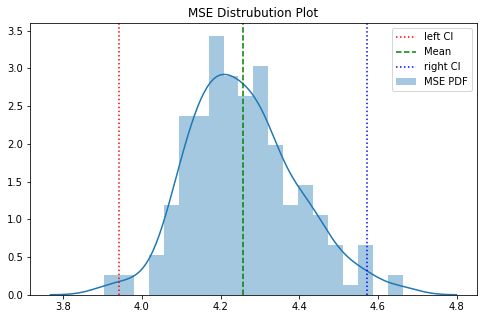

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.distplot(MSE_means, bins=no_of_samples//no_of_bins)
plt.axvline(x=mean_Left_CI, c='red',ls=':')
plt.axvline(x=mean_of_means, c='green',ls='--')
plt.axvline(x=mean_Right_CI, c='blue',ls=':')
plt.legend(['left CI','Mean','right CI','MSE PDF'])
plt.title('MSE Distrubution Plot')
plt.show()

In [11]:
#calculating 95% confidence interval
from prettytable import PrettyTable
OOB_means = []
table = PrettyTable()
table = PrettyTable(["#samples", "Sample Size", "Sample mean", "Sample std","Left C.I","Right C.I"])
for i in range(no_of_samples):
    sample=[OOBs[i] for i in random.choices(range(35),k=10)]
    sample_mean = np.mean(sample)
    OOB_means.append(sample_mean)
    sample_std =  np.std(sample)
    sample_size = len(sample)
    # here we are using sample standard deviation instead of population standard deviation
    left_limit  = np.round(sample_mean - 2*(sample_std/np.sqrt(sample_size)), 3)
    right_limit = np.round(sample_mean + 2*(sample_std/np.sqrt(sample_size)), 3)
    row = []
    row.append(i+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(sample_std)
    row.append(left_limit)
    row.append(right_limit)
    table.add_row(row)
print('======================== Calculation Interval Calculations for OOB =========================')
print(table)

======================== Calculation Interval Calculations for OOB =========================
+----------+-------------+--------------------+---------------------+----------+-----------+
| #samples | Sample Size |    Sample mean     |      Sample std     | Left C.I | Right C.I |
+----------+-------------+--------------------+---------------------+----------+-----------+
|    1     |      10     | 13.55921543177305  |  0.798545250387496  |  13.054  |   14.064  |
|    2     |      10     | 14.201515096828214 |  1.0891759678884523 |  13.513  |   14.89   |
|    3     |      10     | 13.693621671340328 |  0.8267920667645431 |  13.171  |   14.217  |
|    4     |      10     | 13.36427594018969  |  0.7124832996142537 |  12.914  |   13.815  |
|    5     |      10     | 13.223306162673861 |   0.55999960519355  |  12.869  |   13.577  |
|    6     |      10     | 13.55331330595414  |  0.961191885444862  |  12.945  |   14.161  |
|    7     |      10     | 13.69507301039032  |  1.0055819582011918 | 

In [12]:
mean_of_means = np.mean(OOB_means)
std_dev_of_means = np.mean(sample_std)
mean_Left_CI = np.round(mean_of_means - 2*(std_dev_of_means/np.sqrt(10)), 3)
mean_Right_CI = np.round(mean_of_means + 2*(std_dev_of_means/np.sqrt(10)), 3)

print('Mean of Means: ',mean_of_means)
print('Mean Std-Dev : ',std_dev_of_means)
print('Mean Left CI : ',mean_Left_CI)
print('Mean Right CI: ',mean_Right_CI)

Mean of Means:  13.52790990704696
Mean Std-Dev :  1.0893121771769407
Mean Left CI :  12.839
Mean Right CI:  14.217


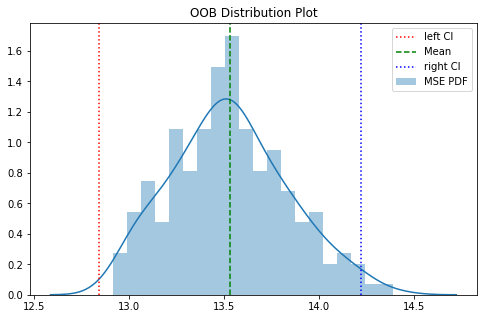

In [13]:
plt.figure(figsize=(8,5))
sns.distplot(OOB_means, bins=no_of_samples//no_of_bins)
plt.axvline(x=mean_Left_CI, c='red',ls=':')
plt.axvline(x=mean_of_means, c='green',ls='--')
plt.axvline(x=mean_Right_CI, c='blue',ls=':')
plt.legend(['left CI','Mean','right CI','MSE PDF'])
plt.title('OOB Distribution Plot')
plt.show()

### Task 3

In [45]:
xq= np.array([0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60])
Y_pred = 0
for i in range(30):
    clf = DecisionTreeRegressor()
    X_train = x[row_indices_iob[i][:,None],col_indices[i]]
    Y_train = y[row_indices_iob[i]]
    clf.fit(X_train,Y_train)
    Y_pred += clf.predict(xq[col_indices[i]].reshape(1,-1)).item()
Y_pred = Y_pred/30

print(Y_pred)

19.661111111111108
